In [1]:
#Install packages
%pip install wandb -qU
%pip install --no-deps scikeras
%pip install tensorflow-addons

     |████████████████████████████████| 1.9 MB 27.6 MB/s 
     |████████████████████████████████| 182 kB 51.5 MB/s 
     |████████████████████████████████| 173 kB 48.0 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 168 kB 55.0 MB/s 
     |████████████████████████████████| 168 kB 51.9 MB/s 
     |████████████████████████████████| 166 kB 50.0 MB/s 
     |████████████████████████████████| 166 kB 14.5 MB/s 
     |████████████████████████████████| 162 kB 58.4 MB/s 
     |████████████████████████████████| 162 kB 21.6 MB/s 
     |████████████████████████████████| 158 kB 15.1 MB/s 
     |████████████████████████████████| 157 kB 61.8 MB/s 
     |████████████████████████████████| 157 kB 57.5 MB/s 
     |████████████████████████████████| 157 kB 51.8 MB/s 
     |████████████████████████████████| 157 kB 61.8 MB/s 
     |████████████████████████████████| 157 kB 44.4 MB/s 
     |████████████████████████████████| 157 kB 21.9 MB/s 
     |██████████

In [2]:
#imports
import wandb
from wandb.keras import WandbCallback
import numpy as np
import pandas as pd
from re import X
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_auc_score
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout

In [3]:
#connect drive containing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Obtain Dataset

In [4]:
#Use pandas read_csv() function to import data
df = pd.read_csv('/content/drive/MyDrive/CSC461/Final Data /Statewide.csv')
df.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0,0,0


Define features and label

In [5]:
#Drop unnecessary features
df = df.drop(["CITY",'ZIP CODE'], axis=1)
df.head()

,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,3,1996,0,1,0,0,0,0,0,0,0,0,0


In [6]:
#Setting our prediction target and dropping target columns from the main dataset
predict = 'TGT STATEWIDE PRIMARY'
drops = ['TGT STATEWIDE PRIMARY','TGT PARTY AFFILIATION']
X = df.drop(drops, axis=1)
y = df[predict]
print(X.head())
print(y.head())

   CURRENT PARTY  YEAR OF BIRTH  ELECTION 3  ELECTION 4  ELECTION 5  \
0              1           1962           1           1           1   
1              2           1984           0           1           0   
2              3           1968           1           1           0   
3              3           1962           1           1           0   
4              3           1996           0           1           0   

   ELECTION 6  ELECTION 7  ELECTION 8  PARTY 5  PARTY 6  PARTY 8  
0           0           1           1        3        0        2  
1           0           0           0        0        0        0  
2           1           1           1        0        3        3  
3           1           1           0        0        3        0  
4           0           0           0        0        0        0  
0    0
1    0
2    1
3    1
4    0
Name: TGT STATEWIDE PRIMARY, dtype: int64


In [7]:
#creates labels for classes
le = LabelEncoder()
le.fit_transform(y)

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
#train_test_split the dataset
X_train, X_test, y_train, y_test =  sklearn.model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)

print(f'Train y: {y_train.shape}')
print(f'Train X: {X_train.shape}')
print(f'Test y: {y_test.shape}')
print(f'Test X: {X_test.shape}')

Train y: (571407,)
Train X: (571407, 11)
Test y: (244890,)
Test X: (244890, 11)


In [9]:
#Scaling the data using MinMaxScaler() in an attempt to normalize data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Perform undersampling in an attempt to fix the unbalanced dataset
##################################################################################
undersample = RandomUnderSampler(sampling_strategy='majority')

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print(f'Train y: {y_train_under.shape}')
print(f'Train X: {X_train_under.shape}')
###################################################################################
undersample = RandomUnderSampler(sampling_strategy='majority')

X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)

print(f'Test y: {y_test_under.shape}')
print(f'Test X: {X_test_under.shape}')

Train y: (192330,)
Train X: (192330, 11)
Test y: (82842,)
Test X: (82842, 11)


In [11]:
#set Hyper-parameters for W&B 
run = wandb.init(entity="gotv-ml", project="ann-propensity-state")
config = run.config
config.opti = 'adamax'
config.batch_size = 128
config.epochs = 100
config.learn_rate = 0.07087
config.fc_layer_size = 15
config.sc_layer_size = 15
config.dropout = 0

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Define Keras Model

In [12]:
def Neural_Net(fc_layer_size=15,sc_layer_size=15,dropout=0):

  # initiate Network
  network = Sequential()

  # input layer that is fully connected with ReLU activation 
  network.add(Dense(11, input_dim=11, activation="relu",use_bias=True,bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  #hidden layers 
  network.add(Dense(fc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  network.add(Dense(sc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))

  #Output layer that is fully connected with sigmoid activation
  network.add(Dense(1, activation="sigmoid"))


  # Compile network model.
  network.compile(optimizer=config.opti,
               loss="binary_crossentropy",
               metrics=["accuracy",
               tfa.metrics.F1Score(num_classes=2,
                                  average='micro',
                                  threshold=0.5),
               tf.keras.metrics.AUC(from_logits=True)
                        ]) 

  #return completed network
  return network 

Compile The Keras Model

In [13]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(
                                build_fn=Neural_Net, 
                                epochs=config.epochs, 
                                batch_size=config.batch_size, 
                                verbose=0,
                                callbacks=[WandbCallback()]
                              )


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Conduct k-Fold Cross-Validation Using scikit-learn and Evaluate the Model with Random Under Sampler Training Data

In [14]:
#Setup stratified Kfold for cross validation
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

In [16]:
#ROC performance metric cross_val
scores_roc = cross_val_score(neural_network, X_train_under, y_train_under,
                         scoring="roc_auc", cv=kfold)

/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
scores_roc

In [ ]:
#F1 performance metric cross_val (F1=measure of a test's accuracy)
scores_f1 = cross_val_score(neural_network,  X_train_under, y_train_under,
                         scoring="f1", cv=kfold)

In [ ]:
scores_f1 

In [17]:
predictions = cross_val_predict(neural_network, X_train_under, y_train_under, cv=kfold)

/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


[[77283 18882]
 [18615 77550]] 



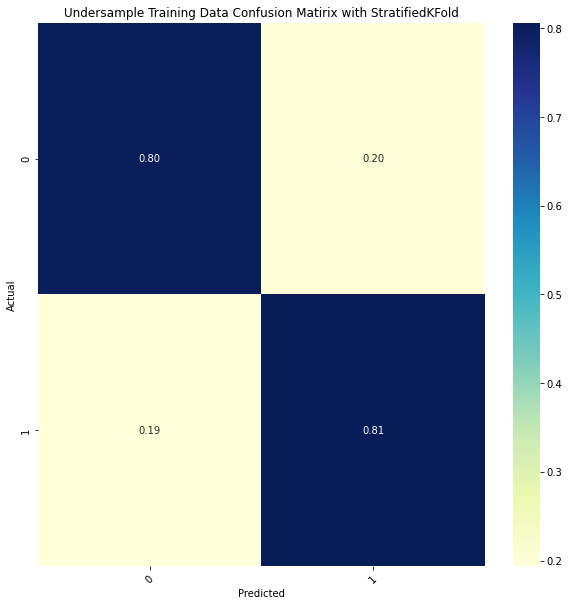


F1 Score: 0.8050378398344722
Precision: 0.8050405670727736
Recall: 0.8050382155669942
Accuracy: 0.8050382155669942


In [18]:
conf_matrix = confusion_matrix(y_train_under, predictions)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Training Data Confusion Matirix with StratifiedKFold')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train_under, predictions, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train_under, predictions, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train_under, predictions, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train_under, predictions, )))

In [26]:
model = neural_network
#Fit the model
model.fit(X_train_under, y_train_under, validation_data=(X_test, y_test), epochs=config.epochs, batch_size=config.batch_size, callbacks=[WandbCallback()])
test_pred = model.predict(X_test)
test_proba = model.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, test_proba[:,1])

print("Test AUC: {}".format(test_accuracy))

/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
wandb: Adding directory to artifact (/content/wandb/run-20221219_053435-1ha6pl22/files/model-best)... Done. 0.0s
wandb: Adding directory to artifact (/content/wandb/run-20221219_053435-1ha6pl22/files/model-best)... Done. 0.0s


Test AUC: 0.886761120886174


Training Data no Cross

-----------
Train predictions & confusion matrix

In [27]:
predictions_train = (model.predict(X_train) > 0.5).astype("int32")

[[382269  92973]
 [ 18711  77454]] 



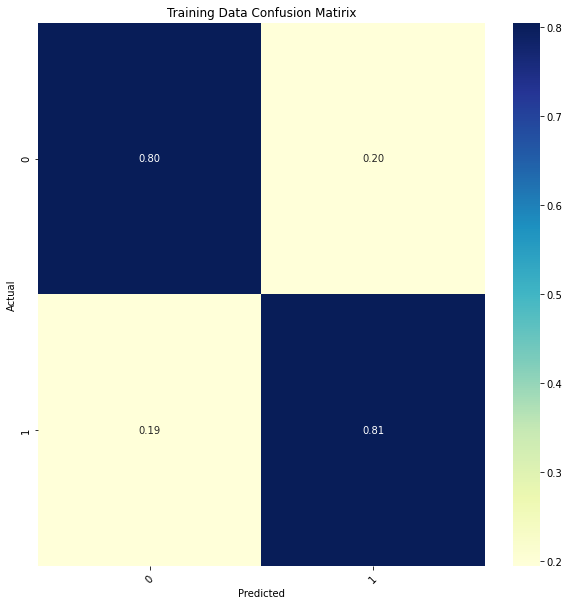


F1 Score: 0.7268034249963867
Precision: 0.869380021843111
Recall: 0.8048976042995306
Accuracy: 0.8045456215972153


In [28]:
conf_matrix = confusion_matrix(y_train, predictions_train)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Training Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train, predictions_train, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train, predictions_train, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train, predictions_train, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train, predictions_train, )))

-----------
Undersanpled train predictions & confusion matrix

In [29]:
predictions_train_under = (model.predict(X_train_under) > 0.5).astype("int32")

[[77489 18676]
 [18711 77454]] 



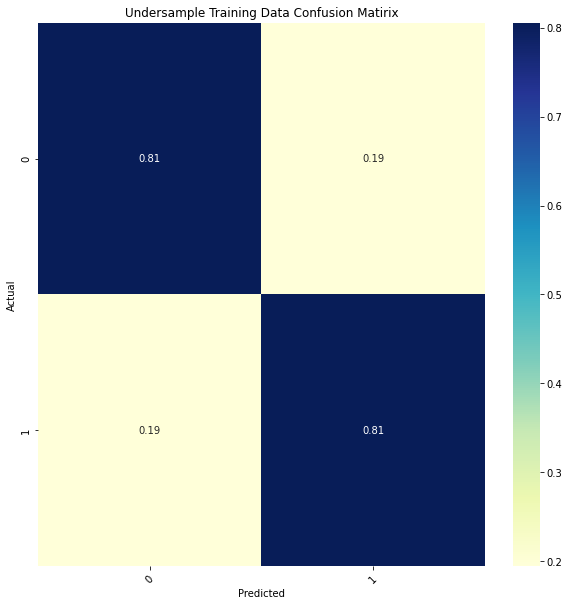


F1 Score: 0.8056101427852141
Precision: 0.8056101897054253
Recall: 0.8056101492226901
Accuracy: 0.8056101492226901


In [30]:
conf_matrix = confusion_matrix(y_train_under, predictions_train_under)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Training Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train_under, predictions_train_under, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train_under, predictions_train_under, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train_under, predictions_train_under, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train_under, predictions_train_under, )))

Test_data


-----------
Test predictions & confusion matrix

In [31]:
predictions_test = (model.predict(X_test) > 0.5).astype("int32")

/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


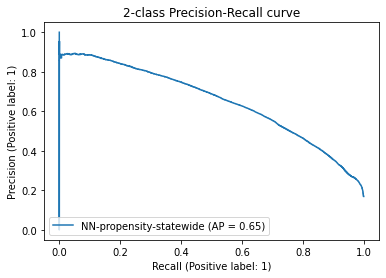

In [32]:
#PR-curve
neural_network.fit(X_train, y_train)


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    neural_network, X_test, y_test, name="NN-propensity-statewide"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[164037  39432]
 [  8057  33364]] 



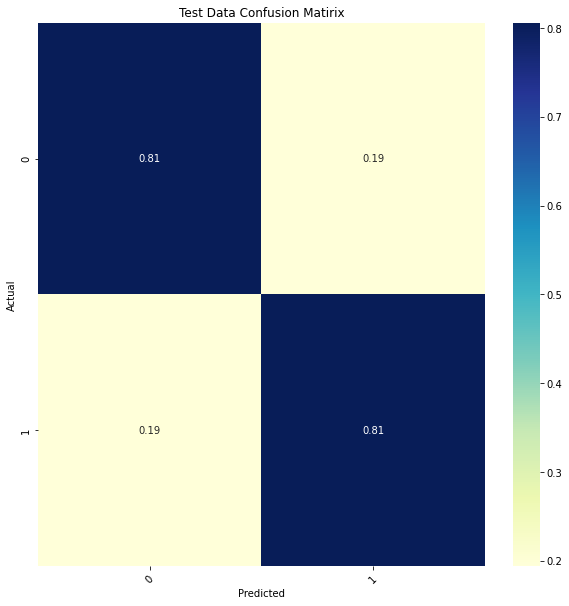


F1 Score: 0.7288868847689844
Precision: 0.8694812109402159
Recall: 0.8058432882393638
Accuracy: 0.806080280942464


In [33]:
conf_matrix = confusion_matrix(y_test, predictions_test)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_test, predictions_test, average='macro')))
print('Precision: {}'.format(
    precision_score(y_test, predictions_test, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_test, predictions_test, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_test, predictions_test, )))

-----------
Undersanpled test predictions & confusion matrix

In [34]:
predictions_test_under = (model.predict(X_test_under) > 0.5).astype("int32")

[[39753  1668]
 [21977 19444]] 



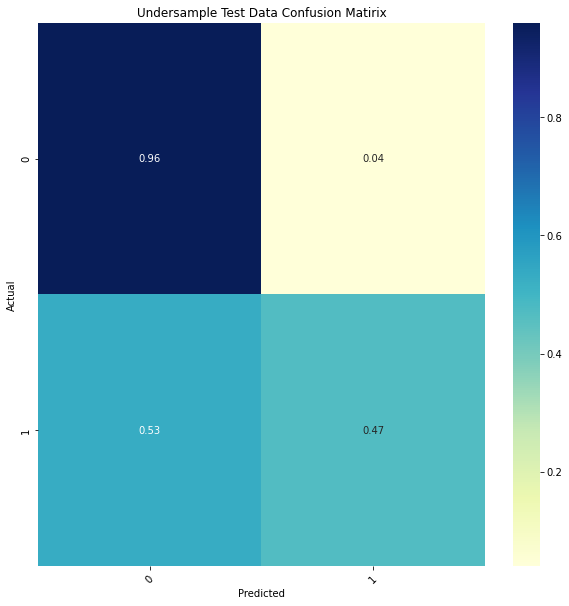


F1 Score: 0.6963262960321632
Precision: 0.7824873283874384
Recall: 0.7145771468578741
Accuracy: 0.714577146857874


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
conf_matrix = confusion_matrix(y_test_under, predictions_test_under)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Test Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_test_under, predictions_test_under, average='macro')))
print('Precision: {}'.format(
    precision_score(y_test_under, predictions_test_under, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_test_under, predictions_test_under, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_test_under, predictions_test_under, )))